<a href="https://colab.research.google.com/github/jm12312/ML-models/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Logistic Regression is Classfication Algorithm

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df1 = df.dropna(subset=["RainToday", "RainTomorrow"])

## EDA

In [8]:
px.histogram(df1, x="Location", color="RainToday" )

In [9]:
px.histogram(df1, x="Cloud3pm", color="RainTomorrow" )

In [10]:
px.histogram(df1, x="Temp3pm", color="RainTomorrow" )

In [11]:
px.histogram(df1, x="Humidity3pm", color="RainTomorrow" )

In [12]:
px.histogram(df1, x="Pressure3pm", color="RainTomorrow" )

In [13]:
px.histogram(df1, x="RainToday", color="RainTomorrow" )

In [14]:
px.scatter(df1, x="MinTemp", y="MaxTemp", color="RainToday")

In [15]:
yr = pd.to_datetime(df1["Date"]).dt.year

In [16]:
fig = px.histogram(x= yr)
fig.update_layout(bargap=0.2)
fig.update_xaxes(tickmode='linear')
fig.show()

In [17]:
train = df1[yr < 2015]
validate = df1[yr==2015]
test = df1[yr > 2015]
print(train.shape)
print(test.shape)
print(validate.shape)

(97988, 23)
(25710, 23)
(17089, 23)


In [18]:
input_cols = list(df1.columns) [1:-1]
target_col = "RainTomorrow"

In [19]:
train_inp = train[input_cols].copy()
val_inp = validate[input_cols].copy()
test_inp = test[input_cols].copy()

train_target = train[target_col].copy()
val_target = validate[target_col].copy()
test_target = test[target_col].copy()

In [20]:
numeric_cols = list(train_inp.select_dtypes(include=np.number).columns)
categorical_cols = list(train_inp.select_dtypes("object").columns)

In [21]:
train_inp[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer.fit(df1[numeric_cols])

SimpleImputer()

In [23]:
pd.DataFrame({"columns":numeric_cols, "mean":imputer.statistics_})

columns         mean
0         MinTemp    12.184824
1         MaxTemp    23.235120
2        Rainfall     2.349974
3     Evaporation     5.472516
4        Sunshine     7.630540
5   WindGustSpeed    39.970520
6    WindSpeed9am    13.990496
7    WindSpeed3pm    18.631141
8     Humidity9am    68.826833
9     Humidity3pm    51.449288
10    Pressure9am  1017.654577
11    Pressure3pm  1015.257963
12       Cloud9am     4.431161
13       Cloud3pm     4.499250
14        Temp9am    16.987066
15        Temp3pm    21.693183

In [24]:
train_inp[numeric_cols] = imputer.transform(train_inp[numeric_cols])
test_inp[numeric_cols] = imputer.transform(test_inp[numeric_cols])
val_inp[numeric_cols] = imputer.transform(val_inp[numeric_cols])

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1[numeric_cols])
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

## **Scaling data**

In [26]:
train_inp[numeric_cols] = scaler.transform(train_inp[numeric_cols])
test_inp[numeric_cols] = scaler.transform(test_inp[numeric_cols])
val_inp[numeric_cols] = scaler.transform(val_inp[numeric_cols])

In [27]:
train_inp.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## **Categorical Data**

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(df1[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [30]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [31]:
train_inp[encoded_cols] = encoder.transform(train_inp[categorical_cols])
val_inp[encoded_cols] = encoder.transform(val_inp[categorical_cols])
test_inp[encoded_cols] = encoder.transform(test_inp[categorical_cols])

## **Training the Model**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
model = LogisticRegression(max_iter=1000)

In [33]:
X_train = train_inp[numeric_cols + encoded_cols]
y_train = train_target

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
val_target = le.transform(val_target)

In [55]:
test_target = le.transform(test_target)

In [89]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
weights = pd.DataFrame({"columns": numeric_cols + encoded_cols,  "weights": model.coef_[0]})
pd.set_option('display.max_rows', 10)

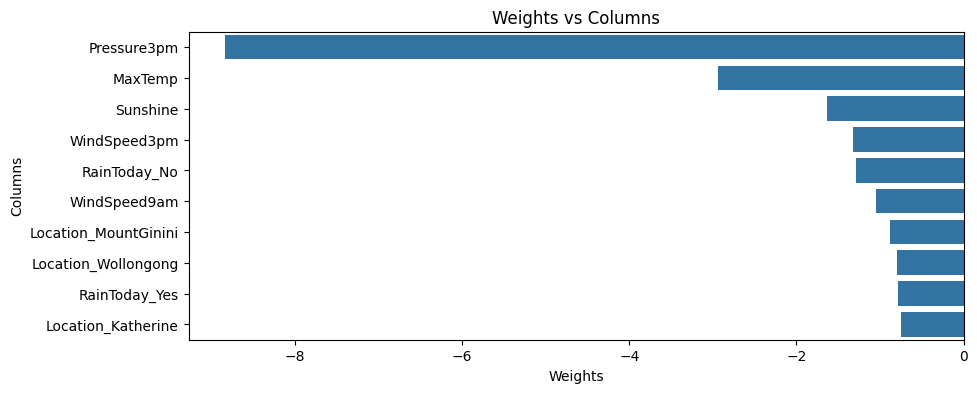

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=weights.sort_values("weights").head(10), x='weights', y='columns')

plt.title('Weights vs Columns')
plt.xlabel('Weights')
plt.ylabel('Columns')
plt.show()

# **Other ML Models**

In [87]:
model_dt = DecisionTreeClassifier(random_state=42, max_depth=8)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(val_inp[numeric_cols + encoded_cols], val_target)

(0.8551863493488998, 0.8461583474749839)

In [86]:
model_rf = RandomForestClassifier(random_state=42, max_depth=15, n_estimators=100, max_features=None)
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train), model_rf.score(val_inp[numeric_cols + encoded_cols], val_target)

(0.9362268849246846, 0.8577447480835625)

In [88]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
model_nb.score(X_train, y_train), model_nb.score(val_inp[numeric_cols + encoded_cols], val_target)

(0.6594378903539209, 0.6683246532857393)

In [78]:
model_xgb = xgb.XGBClassifier(random_state=42, max_depth=7, n_estimators=1000,
                learning_rate=0.05, subsample=0.8, colsample_bytree =0.8, gamma = 0.2, min_child_weight=1)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_train, y_train), model_xgb.score(val_inp[numeric_cols + encoded_cols], val_target)

(0.9357778503490223, 0.8663467727778102)

In [79]:
import lightgbm as lgb

In [85]:
model_lgb = lgb.LGBMClassifier(random_state=42, max_depth=6, n_estimators=1000,
                learning_rate=0.05, subsample=0.8, colsample_bytree =0.8, min_child_weight=1, verbose=-1)
model_lgb.fit(X_train, y_train)
model_lgb.score(X_train, y_train), model_lgb.score(val_inp[numeric_cols + encoded_cols], val_target)

(0.8997020043270605, 0.8648253262332495)

# **Predictions**

In [91]:
x_train = train_inp[numeric_cols+encoded_cols]
x_val = val_inp[numeric_cols+encoded_cols]
x_test = test_inp[numeric_cols+encoded_cols]

Probabilities of being yes/ no (works only for logistic reg)

In [92]:
pred1 = model.predict(x_test)
pred2 = model_dt.predict(x_test)
pred3 = model_rf.predict(x_test)
pred4 = model_xgb.predict(x_test)
pred5 = model_lgb.predict(x_test)

In [94]:
predictions_df = pd.DataFrame({'Logistic Regression': pred1,
                               'Decision Tree': pred2,
                               'Random Forest': pred3,
                               'XGBoost': pred4,
                               'LightGBM': pred5})


correlation_matrix = predictions_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Model Predictions')
plt.show()

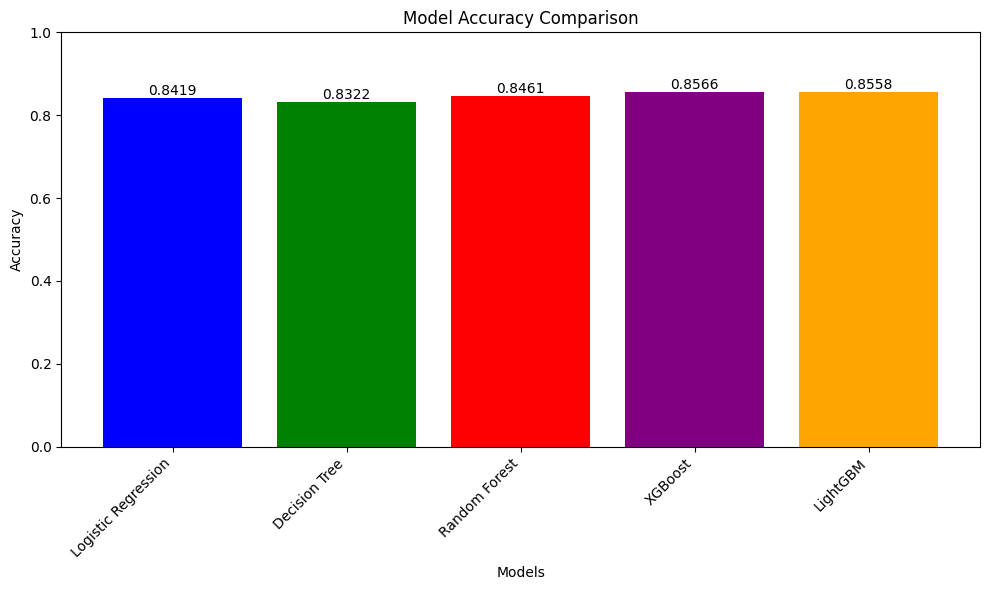

In [99]:
acc1 = accuracy_score(test_target, pred1)
acc2 = accuracy_score(test_target, pred2)
acc3 = accuracy_score(test_target, pred3)
acc4 = accuracy_score(test_target, pred4)
acc5 = accuracy_score(test_target, pred5)


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
accuracies = [acc1, acc2, acc3, acc4, acc5]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotations
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

def predict_plot(input, target):
    pred = model.predict(input)
    acc = accuracy_score(target, pred) * 100
    print("Accuracy: ", str(acc), "%")
    prob = model.predict_proba(input)
    conf = confusion_matrix(target, pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=["Predicted No", "Predicted Yes"],
                yticklabels=["Target No", "Target Yes"])

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Accuracy:  85.21655712944442 %


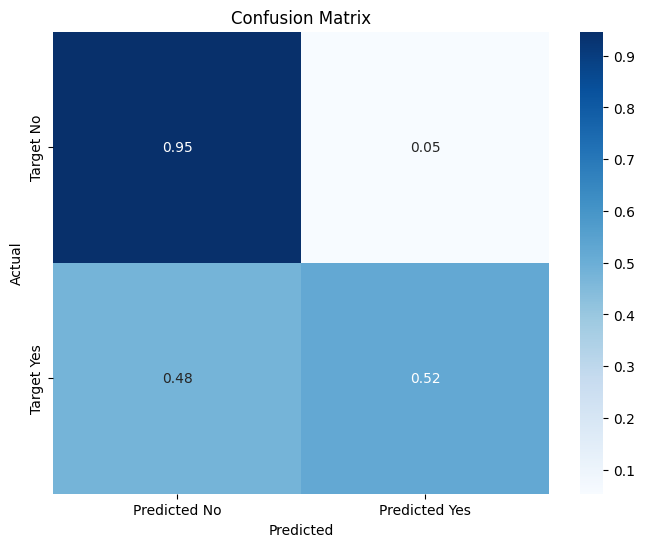

In [ ]:
predict_plot(x_train, train_target)

In [ ]:
predict_plot(x_val, val_target)

Accuracy:  85.36485458482065 %


Accuracy:  84.19292104239595 %


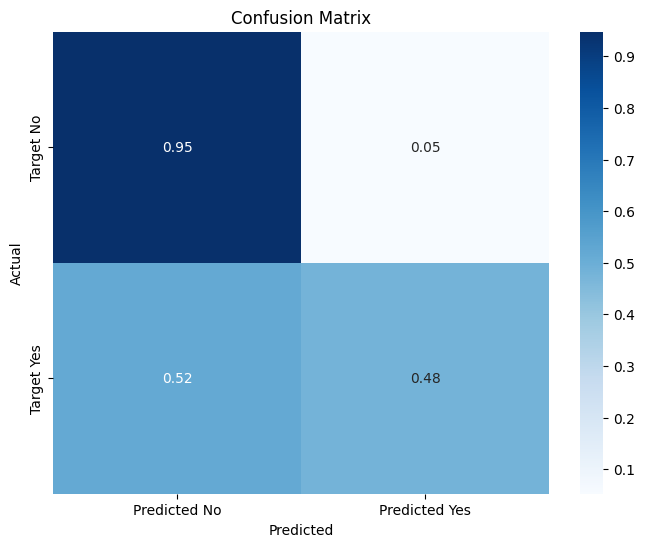

In [ ]:
predict_plot(x_test, test_target)

## Some Models

In [ ]:
def random_guess(input):
  return np.random.choice(["No", "Yes"], len(input))
def all_no(input):
  return np.full(len(input), "No")

In [ ]:
all_no(x_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [ ]:
print(accuracy_score(random_guess(x_train), train_target))
print(accuracy_score(random_guess(x_test), test_target))
print(accuracy_score(random_guess(x_val), val_target))

0.4990100828672899
0.4999222092570984
0.49897594944116097


In [ ]:
print(accuracy_score(all_no(x_train), train_target))
print(accuracy_score(all_no(x_test), test_target))
print(accuracy_score(all_no(x_val), val_target))

0.7775441890843777
0.7734344612991054
0.7906255485985136


## **Testing on samples**

In [ ]:
new_inp = {
    'Date': '2021-06-19',
             'Location': 'Canberra',
             'MinTemp': 10.0,
             'MaxTemp': 21.6,
             'Rainfall': 0,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 22.0,
             'WindDir9am': 'E',
             'WindDir3pm': 'WNW',
             'WindSpeed9am': 9.0,
             'WindSpeed3pm': 15.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1020.6,
             'Pressure3pm': 1019.2,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 10.3,
             'Temp3pm': 22.7,
             'RainToday': 'Yes'
}

In [ ]:
try_df = pd.DataFrame([new_inp])
try_df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Canberra     10.0     21.6         0          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           22.0          E  ...         15.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1020.6       1019.2       8.0       5.0     10.3   

   Temp3pm  RainToday  
0     22.7        Yes  

[1 rows x 22 columns]

In [ ]:
try_df[numeric_cols] = imputer.transform(try_df[numeric_cols])
try_df[numeric_cols] = scaler.transform(try_df[numeric_cols])
try_df[encoded_cols] = encoder.transform(try_df[categorical_cols])

In [ ]:
# pd.set_option("display.max_columns", 10)
try_df


Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Canberra  0.436321  0.499055       0.0     0.028966  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  WindDir3pm_SSE  \
0         NNW       0.124031          E  ...           0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             1.0   

   WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0           0.0            1.0  

[1 rows x 124 columns]

In [ ]:
x_trydf = try_df[numeric_cols + encoded_cols]
x_trydf

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.436321  0.499055       0.0     0.028966  0.526244       0.124031   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0      0.069231      0.172414         0.89         0.58  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             1.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [ ]:
prediction = model.predict(x_trydf)[0]
prediction

'No'

In [ ]:
prob = model.predict_proba(x_trydf)
prob

array([[0.89615192, 0.10384808]])

In [ ]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

## **Saving the model**

In [ ]:
import joblib
australia_rain = {
    "model": model,
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "encoded_cols": encoded_cols,
    "imputer": imputer,
    "scaler": scaler,
    "encoder": encoder,
    "input_cols": input_cols,
    "target_col": target_col
}

In [ ]:
joblib.dump(australia_rain, "australia_rain.joblib")

['australia_rain.joblib']

In [ ]:
australia_rain2 = joblib.load("australia_rain.joblib")
# australia_rain2